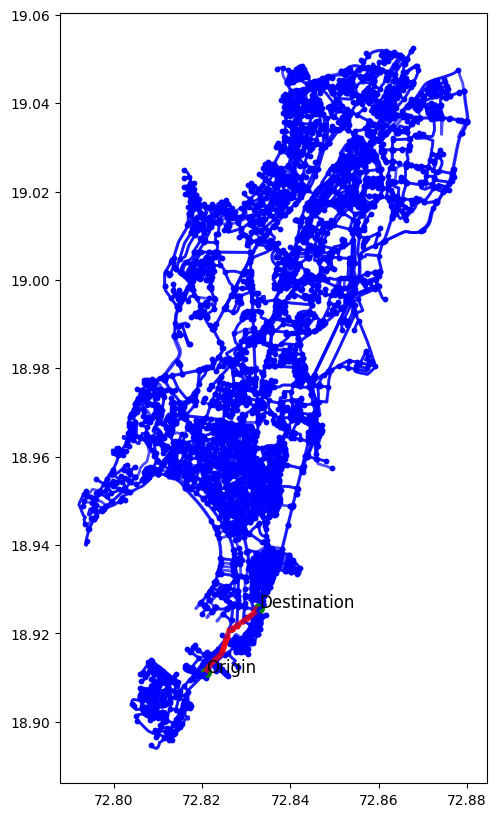

In [44]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt

def get_route(origin, destination, travel_mode='drive'):
    # Retrieve the street network for the given bounding box
    G = ox.graph_from_place('Mumbai, India', network_type='drive')

    # Find the nearest nodes to the specified origin and destination points
    origin_node = ox.distance.nearest_nodes(G, origin[1], origin[0])
    destination_node = ox.distance.nearest_nodes(G, destination[1], destination[0])

    # Calculate the shortest path using Dijkstra's algorithm
    route = nx.shortest_path(G, origin_node, destination_node, weight='length')

    # Extract the nodes and edges for the entire route
    route_nodes = G.subgraph(G.nodes)
    route_edges = G.edges()

    # Create GeoDataFrames for nodes and edges of the entire route
    nodes_gdf, edges_gdf = ox.graph_to_gdfs(route_nodes, edges=route_edges)

    # Create GeoDataFrames for nodes and edges of the shortest path
    shortest_path_nodes_gdf, shortest_path_edges_gdf = ox.graph_to_gdfs(G.subgraph(route), edges=G.edges(route))

    # Create a GeoDataFrame for the origin and destination points
    points_gdf = gpd.GeoDataFrame(geometry=[Point(origin[1], origin[0]), Point(destination[1], destination[0])])

    # Plot the entire route in red and the shortest path in blue
    fig, ax = plt.subplots(figsize=(10, 10))
    edges_gdf.plot(ax=ax, linewidth=2, color='blue', alpha=0.7)
    shortest_path_edges_gdf.plot(ax=ax, linewidth=4, color='red', alpha=0.7)
    nodes_gdf.plot(ax=ax, markersize=10, color='blue')
    shortest_path_nodes_gdf.plot(ax=ax, markersize=10, color='red')
    points_gdf.plot(ax=ax, markersize=50, color='green')

    # Set labels for origin and destination
    ax.text(origin[1], origin[0], 'Origin', color='black', fontsize=12)
    ax.text(destination[1], destination[0], 'Destination', color='black', fontsize=12)

    plt.show()

def main():
    # Replace the coordinates with the actual coordinates of your origin and destination
    # Example coordinates are for Mumbai, India
    origin = (18.911184, 72.820905)  # COLABA BUS STATION, POST OFFICE
    destination = (18.925783, 72.832901)  # DR. SHYAMAPRASAD MUKHERJEE CHOWK(MUSEUM)

    get_route(origin, destination)

if __name__ == "__main__":
    main()
